In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt 

#reading data
colum_names = ['ticker', 'date', 'raw-s', 'raw-s-mean', 'raw-volatility', 'raw-score', 's', 's-mean', 's-volatility', 's-score', 's-volume', 'sv-mean', 'sv-volatility', 'sv-score', 's-dispersion', 's-buzz', 's-delta', 'center-date', 'center-time', 'center-time-zone']
df_2015 = pd.read_csv('SPY2015.txt', skiprows = 6, sep = '\t', names = colum_names)
df_2016 = pd.read_csv('SPY2016.txt', skiprows = 6, sep = '\t', names = colum_names)
df_2017 = pd.read_csv('SPY2017.txt', skiprows=6, sep = '\t', names = colum_names)
#aggregating data
df_temp = df_2015.append(df_2016, ignore_index = True)
df_aggregate = df_temp.append(df_2017, ignore_index = True)
df_datetime = df_aggregate['date'].str.split(' ', n = 1, expand = True )
df_datetime.columns = ['Date', 'Time']
df = pd.merge(df_aggregate, df_datetime, left_index = True, right_index = True)
#cleaning data
#df.drop(['date', 'center-date', 'center-time', 'center-time-zone'], axis = 1)
df['Date'] =  pd.to_datetime(df['Date'])
df_open_score = df[df.Time == '08:55:00']
df_close_score = df[df.Time == '15:55:00']

In [4]:
#two seperate dataframes for open and close sentiment score
df_open_score = df_open_score[df_open_score.columns[df_open_score.columns.isin(['Date', 's-score', 's-volatility', 's-buzz', 's-delta', 'Time'])]]
df_close_score = df_close_score[df_close_score.columns[df_close_score.columns.isin(['Date', 's-score', 's-volatility', 's-buzz', 's-delta', 'Time'])]]

In [5]:
#reading SPY price data
spy_price_date = pd.read_csv('SPY Price Data.csv')
spy_price_date['Date'] =  pd.to_datetime(spy_price_date['Date'])
#cleaning SPY price data
x = np.where(spy_price_date["Date"] == '2015-09-01')
y = np.where(spy_price_date["Date"] == '2017-12-29')
price_df = spy_price_date.loc[y[0][0]:x[0][0], ['Date', 'Adj_Open', 'Adj_Close']]
#calculating returns for open and close
price_df['open_open'] = price_df['Adj_Open'].pct_change()
price_df['close_close'] = price_df['Adj_Close'].pct_change()

In [6]:
#combining sentiment and price data
open_price_score_df = pd.merge(df_open_score, price_df, how='right', on=['Date'])
open_price_score_df = open_price_score_df.dropna()
close_price_score_df = pd.merge(df_close_score, price_df, how='right', on=['Date'])
close_price_score_df = close_price_score_df.dropna()

In [7]:
df_open_score.head(100)

,s-volatility,s-score,s-buzz,s-delta,Date,Time
35,15.706,0.349,1.670,0.031,2015-09-01,08:55:00
129,15.578,-0.458,1.715,0.041,2015-09-02,08:55:00
225,16.194,1.335,0.584,0.000,2015-09-03,08:55:00
321,16.127,0.405,1.086,-0.011,2015-09-04,08:55:00
417,16.355,-0.492,0.644,-0.007,2015-09-05,08:55:00
513,16.464,-0.581,0.369,0.025,2015-09-06,08:55:00
609,16.408,-0.222,0.612,-0.013,2015-09-07,08:55:00
705,16.398,-0.060,0.604,-0.070,2015-09-08,08:55:00
801,17.997,1.723,1.779,-0.002,2015-09-09,08:55:00
897,16.991,-0.358,0.891,-0.005,2015-09-10,08:55:00


In [9]:
#standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = ['s-volatility', 's-score', 's-delta', 's-buzz','open_open', 'close_close']
open_price_score_df[col_names] = scaler.fit_transform(open_price_score_df[col_names])
close_price_score_df[col_names] = scaler.fit_transform(close_price_score_df[col_names])

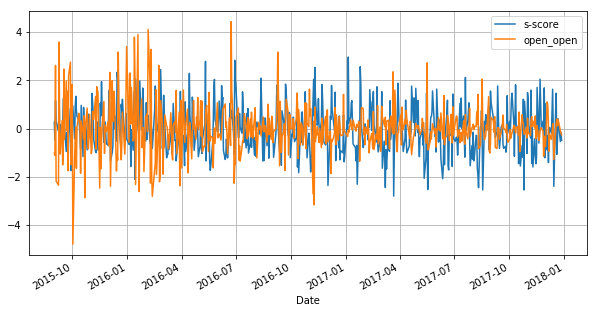

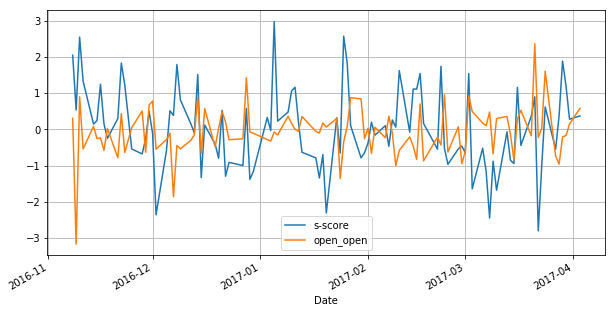

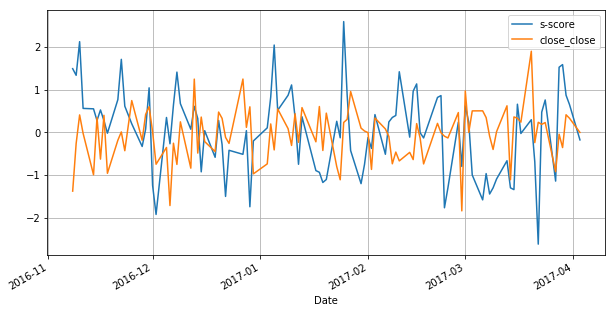

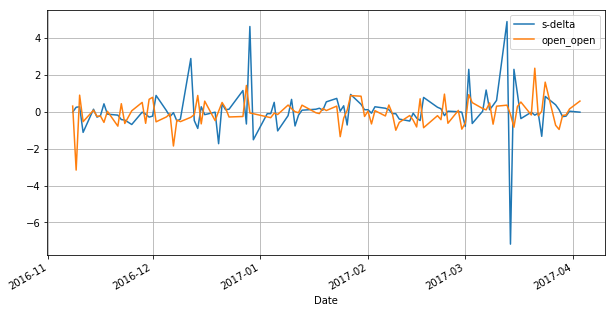

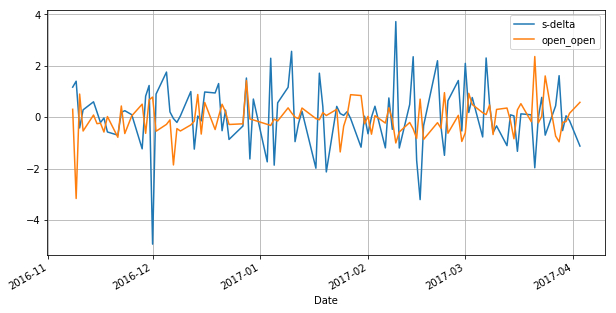

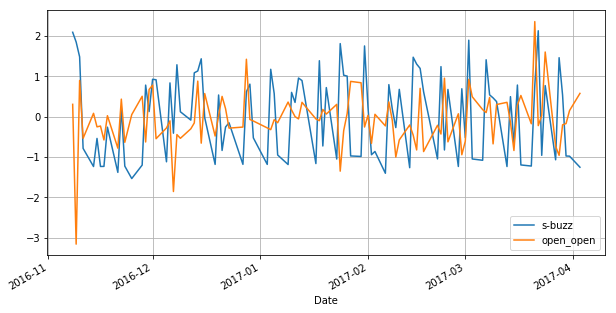

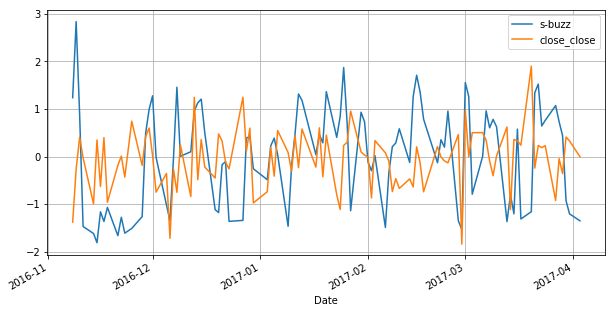

In [10]:
#plotting SPY sentiment against returns
open_price_score_df.plot(x='Date', y=['s-score', 'open_open'], figsize=(10,5), grid=True)
open_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-score', 'open_open'], figsize=(10,5), grid=True)
close_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-score', 'close_close'], figsize=(10,5), grid=True)
open_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-delta', 'open_open'], figsize=(10,5), grid=True)
close_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-delta', 'open_open'], figsize=(10,5), grid=True)
open_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-buzz', 'open_open'], figsize=(10,5), grid=True)
close_price_score_df.iloc[300:400, :].plot(x='Date', y=['s-buzz', 'close_close'], figsize=(10,5), grid=True)

In [7]:
files = []
for i in os.listdir('C:\Users\Aparna Kesarkar\SMA HULL'):
    if i.endswith('.txt'):
        files.append(open(i))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-7-c1efdfcca81b>, line 2)